In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset1 = pd.read_csv("runs_dataset1.csv")
dataset1 

,a,b,c,d,e,f,g,h,o
0,0,1,1,1,1,0,1,1,0
1,1,0,0,1,0,1,1,1,0
2,1,1,1,0,0,1,0,0,0
3,0,1,0,0,0,0,1,1,0
4,1,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,0,1,0,1,1
996,1,1,1,1,1,0,0,0,0
997,0,1,0,1,0,0,0,1,0
998,1,1,1,0,1,1,1,0,0


In [5]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       1000 non-null   int64
 1   b       1000 non-null   int64
 2   c       1000 non-null   int64
 3   d       1000 non-null   int64
 4   e       1000 non-null   int64
 5   f       1000 non-null   int64
 6   g       1000 non-null   int64
 7   h       1000 non-null   int64
 8   o       1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB


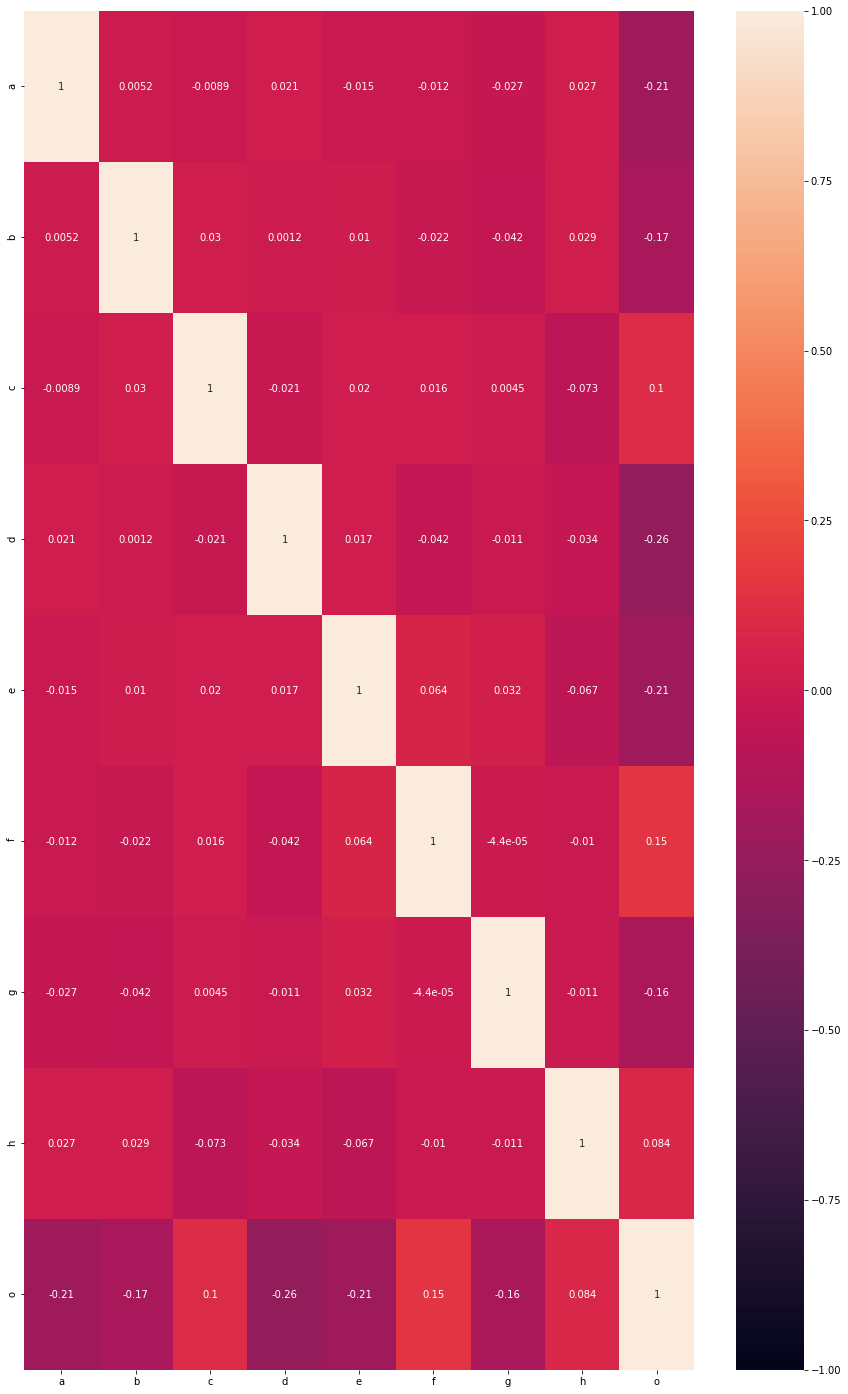

In [6]:
plt.figure(figsize = (15,25))
sns.heatmap(dataset1.corr(), annot = True, vmin = -1)
plt.show()

In [52]:
new_input = dataset1[['a', 'b',	'c',	'd',	'e',	'f', 'g',	'h']]
new_input

,a,b,c,d,e,f,g,h
0,0,1,1,1,1,0,1,1
1,1,0,0,1,0,1,1,1
2,1,1,1,0,0,1,0,0
3,0,1,0,0,0,0,1,1
4,1,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...
995,0,0,1,0,0,1,0,1
996,1,1,1,1,1,0,0,0
997,0,1,0,1,0,0,0,1
998,1,1,1,0,1,1,1,0


In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaller = StandardScaler()
new_input = scaller.fit_transform(new_input)
new_input = pd.DataFrame(new_input)

new_input

,0,1,2,3,4,5,6,7
0,-0.958846,1.020204,1.022247,0.941697,0.982159,-1.002002,0.978237,0.972381
1,1.042920,-0.980196,-0.978237,0.941697,-1.018165,0.998002,0.978237,0.972381
2,1.042920,1.020204,1.022247,-1.061913,-1.018165,0.998002,-1.022247,-1.028403
3,-0.958846,1.020204,-0.978237,-1.061913,-1.018165,-1.002002,0.978237,0.972381
4,1.042920,-0.980196,-0.978237,0.941697,0.982159,0.998002,-1.022247,-1.028403
...,...,...,...,...,...,...,...,...
995,-0.958846,-0.980196,1.022247,-1.061913,-1.018165,0.998002,-1.022247,0.972381
996,1.042920,1.020204,1.022247,0.941697,0.982159,-1.002002,-1.022247,-1.028403
997,-0.958846,1.020204,-0.978237,0.941697,-1.018165,-1.002002,-1.022247,0.972381
998,1.042920,1.020204,1.022247,-1.061913,0.982159,0.998002,0.978237,-1.028403


In [55]:
output_data = dataset1['o']
output_data

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    0
997    0
998    0
999    0
Name: o, Length: 1000, dtype: int64

In [56]:
from tensorflow.keras.utils import to_categorical

In [57]:
output_cat = to_categorical(output_data)
output_cat

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [59]:
model = Sequential()
model.add(Dense(64, activation = 'relu', input_dim = 8))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])

In [60]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 130       
Total params: 9,026
Trainable params: 9,026
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.fit(new_input, output_cat, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 0.4862 - accuracy: 0.7600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8660
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.1518 - accuracy: 0.9500
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9940
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 1.0000


In [62]:
model.evaluate(new_input, output_cat)

32/32 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 1.0000


[0.012765166349709034, 1.0]

In [63]:
model.save("latihan02.h5")

In [75]:
newnew_input = [list(map(int, input().split(",")))]
scaled_input = scaller.transform(newnew_input)

output_category = ['False(0)', 'True(1)']
result = model.predict(scaled_input)

In [76]:
hasil_akhir = output_category[np.argmax(result)]

print("Hasil Akhir : ", hasil_akhir)

Hasil Akhir :  False
